# importing  necessary libraries

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

C:\Users\RO20121097\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df_train=pd.read_csv('train.csv')
df_train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [4]:
df_test=pd.read_csv('test.csv')
df_test.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


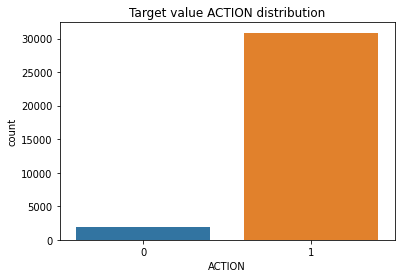

In [5]:
sb.countplot(x='ACTION',data=df_train);
plt.title('Target value ACTION distribution');

# Exploratory Data Analysis

In [6]:
#EDA using D-tale library

import dtale
dtale.show(df_train)
# d.open_browser()

C:\Users\RO20121097\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\RO20121097\AppData\Local\Continuum\anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [7]:
df_train.describe()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
count,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000
mean,0.942110,42923.916171,25988.957979,116952.627788,118301.823156,118912.779914,125916.152644,170178.369648,183703.408893,119789.430132
std,0.233539,34173.892702,35928.031650,10875.563591,4551.588572,18961.322917,31036.465825,69509.462130,100488.407413,5784.275516
min,0.000000,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000
25%,1.000000,20299.000000,4566.000000,117961.000000,118102.000000,118395.000000,118274.000000,117906.000000,118363.000000,118232.000000
50%,1.000000,35376.000000,13545.000000,117961.000000,118300.000000,118921.000000,118568.000000,128696.000000,119006.000000,118570.000000
75%,1.000000,74189.000000,42034.000000,117961.000000,118386.000000,120535.000000,120006.000000,235280.000000,290919.000000,119348.000000
max,1.000000,312153.000000,311696.000000,311178.000000,286791.000000,286792.000000,311867.000000,311867.000000,308574.000000,270691.000000


Text(0.5, 1.0, 'Heat Map')

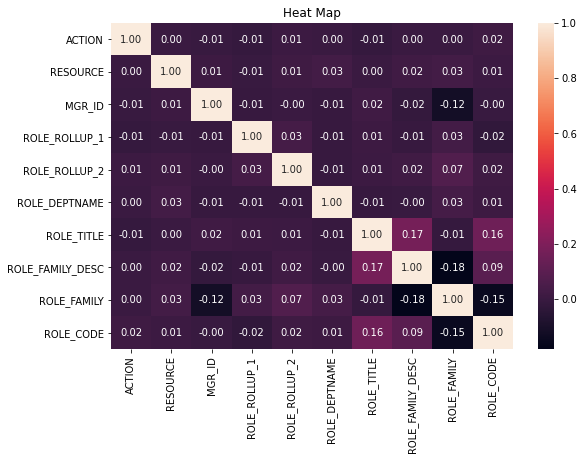

In [8]:
plt.figure(figsize=(9,6))
sb.heatmap(df_train.corr(),annot=True,fmt='.2f')
plt.title('Heat Map')

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


# Featuring Engineering

In [10]:
column_names=df_train.columns.to_list()
column_names.remove('ACTION')
column_names

['RESOURCE',
 'MGR_ID',
 'ROLE_ROLLUP_1',
 'ROLE_ROLLUP_2',
 'ROLE_DEPTNAME',
 'ROLE_TITLE',
 'ROLE_FAMILY_DESC',
 'ROLE_FAMILY',
 'ROLE_CODE']

In [11]:
#Missing value treatment

def check_missing(df,src_col):
    print(f"{df[src_col].isnull().sum()}")

for col in column_names:
    check_missing(df_train,col)



0
0
0
0
0
0
0
0
0


In [39]:
def supervisedratio(df,source_col_name,target):
    excellent_lbl_group=df.groupby([source_col_name])[target].sum().rename('Excellent_Count')
    total_lbl_group=df.groupby([source_col_name])[target].count().rename('Total_count')
    Excellent_count_df=pd.concat([excellent_lbl_group,total_lbl_group],axis=1)
    Excellent_count_df[source_col_name+'_sup_ratio']=Excellent_count_df.Excellent_Count/Excellent_count_df.Total_count
    Excellent_count_df=Excellent_count_df.reset_index()
    globals()['dict_sup_ratio_%s'%source_col_name]=pd.Series(Excellent_count_df[source_col_name+'_sup_ratio'].values,
                                                             index=Excellent_count_df[source_col_name]).to_dict()
    dic=pd.Series(Excellent_count_df[source_col_name+'_sup_ratio'].values,index=Excellent_count_df[source_col_name]).to_dict()
    df[source_col_name]=df[source_col_name].map(dic)

In [40]:
for col in column_names:
    supervisedratio(df_train,col,'ACTION')

In [41]:
df_train

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,1.000000,1.000000,0.949222,0.956148,0.958333,0.967625,0.933440,0.942350,0.967625
1,1,0.966667,1.000000,0.949222,0.969075,0.893082,0.962963,1.000000,0.947941,0.962963
2,1,1.000000,1.000000,0.918478,0.918478,0.923077,0.889331,0.939394,0.907815,0.889331
3,1,1.000000,1.000000,0.949222,0.969075,0.989474,0.920413,0.955788,0.942350,0.920413
4,1,1.000000,1.000000,0.931159,0.876812,0.755556,0.866667,0.947368,0.837017,0.866667
...,...,...,...,...,...,...,...,...,...,...
32764,1,0.901961,0.965517,0.949222,0.956148,0.989474,0.920413,0.955788,0.942350,0.920413
32765,1,1.000000,1.000000,0.963939,0.963939,1.000000,1.000000,1.000000,0.977679,1.000000
32766,1,0.962733,1.000000,0.949222,0.954563,1.000000,1.000000,1.000000,0.974359,1.000000
32767,1,1.000000,0.687500,0.734545,0.719844,0.864947,0.913706,0.860656,0.862671,0.913706


In [43]:
X=df_train[column_names]
y=df_train[['ACTION']]

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Creating model to train

# Model 1

In [58]:
#Create model
model = Sequential()
model.add(Dense(12, input_dim=9, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))




In [59]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
#fit model

model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
2294/2294 [==============================] - 9s 3ms/step - loss: 0.2159 - accuracy: 0.9433
Epoch 2/150
2294/2294 [==============================] - 6s 3ms/step - loss: 0.1077 - accuracy: 0.9634
Epoch 3/150
2294/2294 [==============================] - 8s 4ms/step - loss: 0.0939 - accuracy: 0.9650
Epoch 4/150
2294/2294 [==============================] - 8s 3ms/step - loss: 0.0977 - accuracy: 0.9648
Epoch 5/150
2294/2294 [==============================] - 6s 3ms/step - loss: 0.0881 - accuracy: 0.9683
Epoch 6/150
2294/2294 [==============================] - 6s 3ms/step - loss: 0.0901 - accuracy: 0.9674
Epoch 7/150
2294/2294 [==============================] - 6s 3ms/step - loss: 0.0855 - accuracy: 0.9681
Epoch 8/150
2294/2294 [==============================] - 6s 2ms/step - loss: 0.0800 - accuracy: 0.9696
Epoch 9/150
2294/2294 [==============================] - 6s 2ms/step - loss: 0.0869 - accuracy: 0.9679
Epoch 10/150
2294/2294 [==============================] - 6s 2ms/step - l

In [63]:
# evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

308/308 [==============================] - 1s 2ms/step - loss: 0.0657 - accuracy: 0.9730
Accuracy: 97.30


# Model 2
#using cross validation method 

In [64]:
def create_baseline():
    # create model
    model2 = Sequential()
    model2.add(Dense(16, input_dim=9, activation='relu'))
    model2.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model2

In [66]:
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/100
4129/4129 [==============================] - 13s 3ms/step - loss: 0.2580 - accuracy: 0.8807
Epoch 2/100
4129/4129 [==============================] - 11s 3ms/step - loss: 0.0973 - accuracy: 0.9650
Epoch 3/100
4129/4129 [==============================] - 12s 3ms/step - loss: 0.0945 - accuracy: 0.9665
Epoch 4/100
4129/4129 [==============================] - 16s 4ms/step - loss: 0.0869 - accuracy: 0.9686
Epoch 5/100
4129/4129 [==============================] - 11s 3ms/step - loss: 0.0890 - accuracy: 0.9687
Epoch 6/100
4129/4129 [==============================] - 9s 2ms/step - loss: 0.0916 - accuracy: 0.9675
Epoch 7/100
4129/4129 [==============================] - 10s 2ms/step - loss: 0.0913 - accuracy: 0.9675 0s - loss: 0.0913 - accuracy: 
Epoch 8/100
4129/4129 [==============================] - 10s 2ms/step - loss: 0.0918 - accuracy: 0.9693
Epoch 9/100
4129/4129 [==============================] - 10s 2ms/step - loss: 0.0947 - accuracy: 0.9669
Epoch 10/100
4129/4129 [==========

4129/4129 [==============================] - 11s 3ms/step - loss: 0.0739 - accuracy: 0.9729
Epoch 55/100
4129/4129 [==============================] - 9s 2ms/step - loss: 0.0756 - accuracy: 0.9705
Epoch 56/100
4129/4129 [==============================] - 8s 2ms/step - loss: 0.0718 - accuracy: 0.9733
Epoch 57/100
4129/4129 [==============================] - 8s 2ms/step - loss: 0.0767 - accuracy: 0.9714
Epoch 58/100
4129/4129 [==============================] - 7s 2ms/step - loss: 0.0729 - accuracy: 0.9702
Epoch 59/100
4129/4129 [==============================] - 6s 1ms/step - loss: 0.0768 - accuracy: 0.9693
Epoch 60/100
4129/4129 [==============================] - 5s 1ms/step - loss: 0.0693 - accuracy: 0.9729
Epoch 61/100
4129/4129 [==============================] - 7s 2ms/step - loss: 0.0718 - accuracy: 0.9718
Epoch 62/100
4129/4129 [==============================] - 5s 1ms/step - loss: 0.0718 - accuracy: 0.9716
Epoch 63/100
4129/4129 [==============================] - 6s 2ms/step - loss

4129/4129 [==============================] - 5s 1ms/step - loss: 0.0900 - accuracy: 0.9675
Epoch 9/100
4129/4129 [==============================] - 5s 1ms/step - loss: 0.0954 - accuracy: 0.9642
Epoch 10/100
4129/4129 [==============================] - 5s 1ms/step - loss: 0.0922 - accuracy: 0.9670
Epoch 11/100
4129/4129 [==============================] - 6s 1ms/step - loss: 0.0868 - accuracy: 0.9675
Epoch 12/100
4129/4129 [==============================] - 6s 2ms/step - loss: 0.0875 - accuracy: 0.9684
Epoch 13/100
4129/4129 [==============================] - 5s 1ms/step - loss: 0.0912 - accuracy: 0.9675
Epoch 14/100
4129/4129 [==============================] - 7s 2ms/step - loss: 0.0854 - accuracy: 0.9689
Epoch 15/100
4129/4129 [==============================] - 5s 1ms/step - loss: 0.0919 - accuracy: 0.9662
Epoch 16/100
4129/4129 [==============================] - 6s 2ms/step - loss: 0.0879 - accuracy: 0.9685
Epoch 17/100
4129/4129 [==============================] - 7s 2ms/step - loss: 

4129/4129 [==============================] - 7s 2ms/step - loss: 0.0837 - accuracy: 0.9678
Epoch 87/100
4129/4129 [==============================] - 8s 2ms/step - loss: 0.0905 - accuracy: 0.9653
Epoch 88/100
4129/4129 [==============================] - 7s 2ms/step - loss: 0.0843 - accuracy: 0.9693
Epoch 89/100
4129/4129 [==============================] - 6s 1ms/step - loss: 0.0887 - accuracy: 0.9674
Epoch 90/100
4129/4129 [==============================] - 5s 1ms/step - loss: 0.0863 - accuracy: 0.9666
Epoch 91/100
4129/4129 [==============================] - 5s 1ms/step - loss: 0.0842 - accuracy: 0.9683
Epoch 92/100
4129/4129 [==============================] - 6s 1ms/step - loss: 0.0846 - accuracy: 0.9683
Epoch 93/100
4129/4129 [==============================] - 8s 2ms/step - loss: 0.0825 - accuracy: 0.9684
Epoch 94/100
4129/4129 [==============================] - 7s 2ms/step - loss: 0.0828 - accuracy: 0.9694
Epoch 95/100
4129/4129 [==============================] - 5s 1ms/step - loss:

4129/4129 [==============================] - 5s 1ms/step - loss: 0.0889 - accuracy: 0.9678
Epoch 41/100
4129/4129 [==============================] - 5s 1ms/step - loss: 0.0904 - accuracy: 0.9655
Epoch 42/100
4129/4129 [==============================] - 5s 1ms/step - loss: 0.0896 - accuracy: 0.9693
Epoch 43/100
4129/4129 [==============================] - 5s 1ms/step - loss: 0.0962 - accuracy: 0.9647
Epoch 44/100
4129/4129 [==============================] - 5s 1ms/step - loss: 0.0905 - accuracy: 0.9658
Epoch 45/100
4129/4129 [==============================] - 7s 2ms/step - loss: 0.0873 - accuracy: 0.9683
Epoch 46/100
4129/4129 [==============================] - 6s 1ms/step - loss: 0.0876 - accuracy: 0.9680
Epoch 47/100
4129/4129 [==============================] - 7s 2ms/step - loss: 0.0919 - accuracy: 0.9670
Epoch 48/100
4129/4129 [==============================] - 5s 1ms/step - loss: 0.0976 - accuracy: 0.9644
Epoch 49/100
4129/4129 [==============================] - 7s 2ms/step - loss:

Epoch 95/100
4129/4129 [==============================] - 9s 2ms/step - loss: 0.0824 - accuracy: 0.9709
Epoch 96/100
4129/4129 [==============================] - 7s 2ms/step - loss: 0.0921 - accuracy: 0.9681
Epoch 97/100
4129/4129 [==============================] - 8s 2ms/step - loss: 0.0923 - accuracy: 0.9682
Epoch 98/100
4129/4129 [==============================] - 10s 2ms/step - loss: 0.0873 - accuracy: 0.9675
Epoch 99/100
4129/4129 [==============================] - 9s 2ms/step - loss: 0.0881 - accuracy: 0.9670
Epoch 100/100
459/459 [==============================] - 2s 2ms/step - loss: 0.0922 - accuracy: 0.9634
Epoch 1/100
4129/4129 [==============================] - 12s 2ms/step - loss: 0.1954 - accuracy: 0.9439
Epoch 2/100
4129/4129 [==============================] - 8s 2ms/step - loss: 0.1002 - accuracy: 0.9644
Epoch 3/100
4129/4129 [==============================] - 7s 2ms/step - loss: 0.0889 - accuracy: 0.9680
Epoch 4/100
4129/4129 [==============================] - 6s 1ms/st

4129/4129 [==============================] - 5s 1ms/step - loss: 0.0736 - accuracy: 0.9714
Epoch 57/100
4129/4129 [==============================] - 6s 2ms/step - loss: 0.0762 - accuracy: 0.9711
Epoch 58/100
4129/4129 [==============================] - 7s 2ms/step - loss: 0.0764 - accuracy: 0.9704
Epoch 59/100
4129/4129 [==============================] - 6s 1ms/step - loss: 0.0782 - accuracy: 0.9680
Epoch 60/100
4129/4129 [==============================] - 6s 1ms/step - loss: 0.0748 - accuracy: 0.9698
Epoch 61/100
4129/4129 [==============================] - 5s 1ms/step - loss: 0.0762 - accuracy: 0.9694
Epoch 62/100
4129/4129 [==============================] - 6s 1ms/step - loss: 0.0745 - accuracy: 0.9703
Epoch 63/100
4129/4129 [==============================] - 6s 1ms/step - loss: 0.0736 - accuracy: 0.9708
Epoch 64/100
4129/4129 [==============================] - 6s 1ms/step - loss: 0.0771 - accuracy: 0.9680
Epoch 65/100
4129/4129 [==============================] - 6s 2ms/step - loss:

4130/4130 [==============================] - 9s 2ms/step - loss: 0.0914 - accuracy: 0.9675
Epoch 34/100
4130/4130 [==============================] - 10s 2ms/step - loss: 0.0899 - accuracy: 0.9684
Epoch 35/100
4130/4130 [==============================] - 10s 2ms/step - loss: 0.0962 - accuracy: 0.9653
Epoch 36/100
4130/4130 [==============================] - 10s 2ms/step - loss: 0.0936 - accuracy: 0.9652
Epoch 37/100
4130/4130 [==============================] - 11s 3ms/step - loss: 0.0937 - accuracy: 0.9652
Epoch 38/100
4130/4130 [==============================] - 11s 3ms/step - loss: 0.0850 - accuracy: 0.9691
Epoch 39/100
4130/4130 [==============================] - 13s 3ms/step - loss: 0.0898 - accuracy: 0.9692
Epoch 40/100
4130/4130 [==============================] - 12s 3ms/step - loss: 0.0901 - accuracy: 0.9675
Epoch 41/100
4130/4130 [==============================] - 9s 2ms/step - loss: 0.0954 - accuracy: 0.9656
Epoch 42/100
4130/4130 [==============================] - 9s 2ms/step 